In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv("Dataset/user_behavior_dataset.csv")

In [8]:
df.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


In [9]:
df.shape

(700, 11)

# Preprocessing

 Check Null Values in Datset

In [10]:
df.isna().mean()

User ID                       0.0
Device Model                  0.0
Operating System              0.0
App Usage Time (min/day)      0.0
Screen On Time (hours/day)    0.0
Battery Drain (mAh/day)       0.0
Number of Apps Installed      0.0
Data Usage (MB/day)           0.0
Age                           0.0
Gender                        0.0
User Behavior Class           0.0
dtype: float64

✔ Check Duplicated Values in Datset

In [11]:
df.duplicated().mean()

0.0

In [17]:
df.info

<bound method DataFrame.info of      User ID        Device Model Operating System  App Usage Time (min/day)  \
0          1      Google Pixel 5          Android                       393   
1          2           OnePlus 9          Android                       268   
2          3        Xiaomi Mi 11          Android                       154   
3          4      Google Pixel 5          Android                       239   
4          5           iPhone 12              iOS                       187   
..       ...                 ...              ...                       ...   
695      696           iPhone 12              iOS                        92   
696      697        Xiaomi Mi 11          Android                       316   
697      698      Google Pixel 5          Android                        99   
698      699  Samsung Galaxy S21          Android                        62   
699      700           OnePlus 9          Android                       212   

     Screen On Time

In [12]:
df.describe()

,User ID,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class
count,700.00000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,350.50000,271.128571,5.272714,1525.158571,50.681429,929.742857,38.482857,2.990000
std,202.21688,177.199484,3.068584,819.136414,26.943324,640.451729,12.012916,1.401476
min,1.00000,30.000000,1.000000,302.000000,10.000000,102.000000,18.000000,1.000000
25%,175.75000,113.250000,2.500000,722.250000,26.000000,373.000000,28.000000,2.000000
50%,350.50000,227.500000,4.900000,1502.500000,49.000000,823.500000,38.000000,3.000000
75%,525.25000,434.250000,7.400000,2229.500000,74.000000,1341.000000,49.000000,4.000000
max,700.00000,598.000000,12.000000,2993.000000,99.000000,2497.000000,59.000000,5.000000


In [13]:
df.drop(columns=['User ID'], axis=1, inplace=True)

In [14]:
# finding users with highest lowest and average of all social apps usage time
# User with Highest Social Media Time
max_user = df.loc[df['App Usage Time (min/day)'].idxmax()]
print("User with Highest Social Media Time:")
print(max_user)

# User with Lowest Social Media Time
min_user = df.loc[df['App Usage Time (min/day)'].idxmin()]
print("\nUser with Lowest Social Media Time:")
print(min_user)

# Average Social Media Time
average_time = df['App Usage Time (min/day)'].mean()
print(f"Average Social Media Time: {average_time:.2f} hours")



User with Highest Social Media Time:
Device Model                  OnePlus 9
Operating System                Android
App Usage Time (min/day)            598
Screen On Time (hours/day)         11.2
Battery Drain (mAh/day)            2876
Number of Apps Installed             85
Data Usage (MB/day)                2477
Age                                  58
Gender                           Female
User Behavior Class                   5
Name: 367, dtype: object

User with Lowest Social Media Time:
Device Model                  OnePlus 9
Operating System                Android
App Usage Time (min/day)             30
Screen On Time (hours/day)          1.3
Battery Drain (mAh/day)             479
Number of Apps Installed             16
Data Usage (MB/day)                 253
Age                                  35
Gender                             Male
User Behavior Class                   1
Name: 244, dtype: object
Average Social Media Time: 271.13 hours


# Exploratory Data Analysis

In [15]:
df['User Behavior Class'].value_counts

<bound method IndexOpsMixin.value_counts of 0      4
1      3
2      2
3      3
4      3
      ..
695    2
696    4
697    2
698    1
699    3
Name: User Behavior Class, Length: 700, dtype: int64>

C:\Users\deepa\AppData\Local\Temp\ipykernel_22248\1572578317.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['User Behavior Class'],palette='viridis')


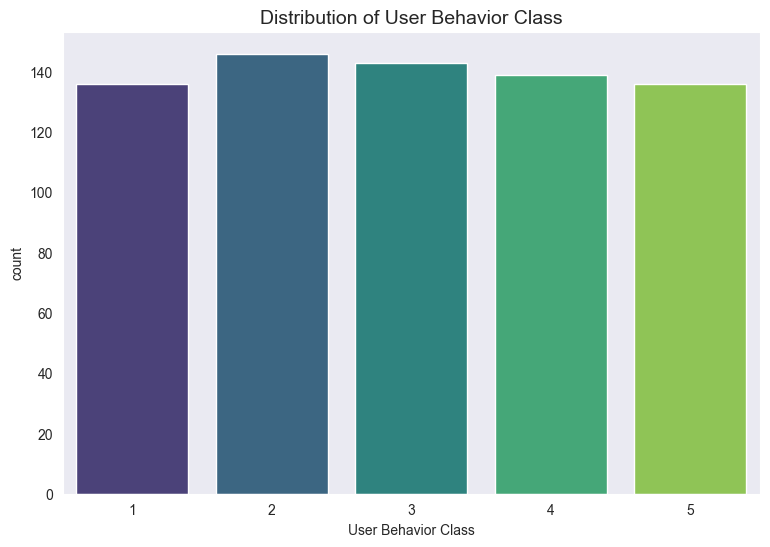

In [16]:
sns.set_style(style='dark')
plt.figure(figsize=(9,6))
plt.title('Distribution of User Behavior Class', fontsize=14)
sns.countplot(x=df['User Behavior Class'],palette='viridis')
plt.show()

In [17]:
df['Device Model'].value_counts()

Device Model
Xiaomi Mi 11          146
iPhone 12             146
Google Pixel 5        142
OnePlus 9             133
Samsung Galaxy S21    133
Name: count, dtype: int64

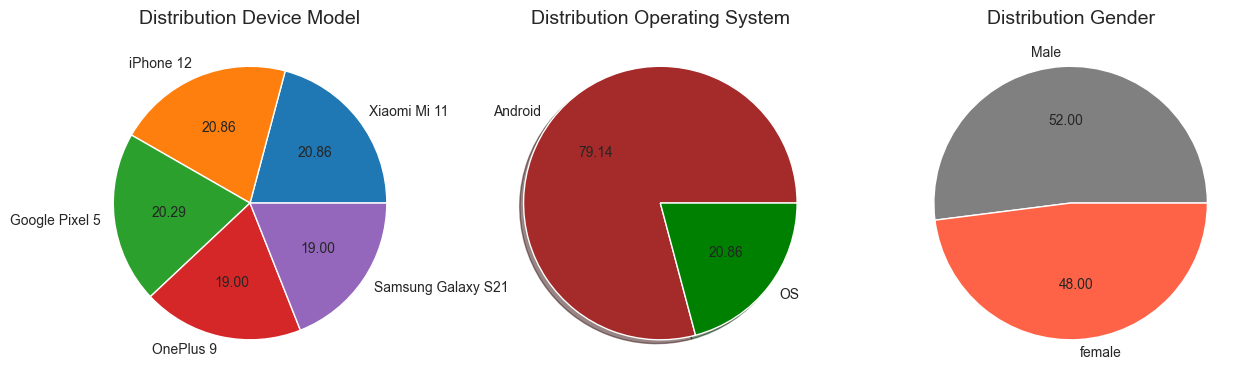

In [18]:
plt.figure(figsize=(15,12))
plt.subplot(1,3,1)
plt.title('Distribution Device Model', fontsize=14)
plt.pie(x=df['Device Model'].value_counts(), autopct='%.2f', labels=['Xiaomi Mi 11', 'iPhone 12', 'Google Pixel 5', 'OnePlus 9', 'Samsung Galaxy S21'])


plt.subplot(1,3,2)
plt.title('Distribution Operating System', fontsize=14)
plt.pie(x=df['Operating System'].value_counts(), autopct='%.2f', colors=['brown', 'green'], shadow=True, labels=['Android', 'OS'])

plt.subplot(1,3,3)
plt.title('Distribution Gender', fontsize=14)
plt.pie(x=df['Gender'].value_counts(), autopct='%.2f', colors=['gray', 'tomato'], labels=['Male', 'female'])
plt.show()

In [19]:
df['Gender'].value_counts()

Gender
Male      364
Female    336
Name: count, dtype: int64

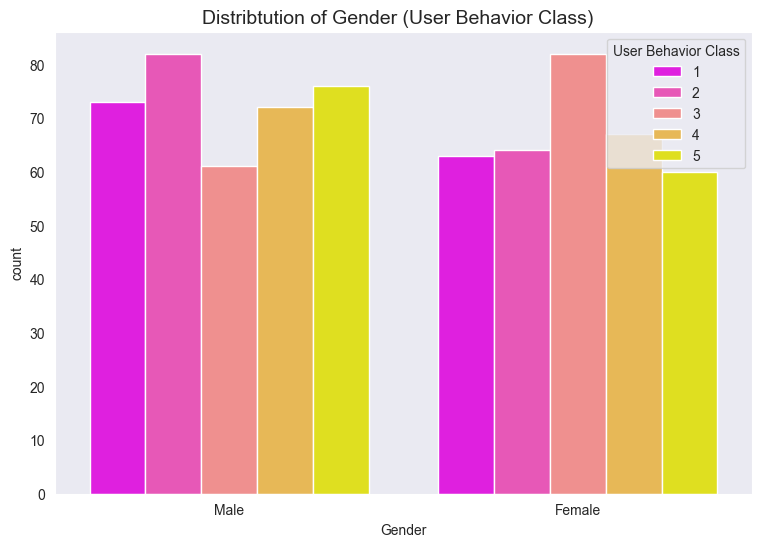

In [20]:
plt.figure(figsize=(9,6))
plt.title('Distribtution of Gender (User Behavior Class)  ', fontsize=14)
sns.countplot(x=df['Gender'], palette='spring', hue=df['User Behavior Class'])
plt.show()

In [21]:
df['Operating System'].value_counts()

Operating System
Android    554
iOS        146
Name: count, dtype: int64

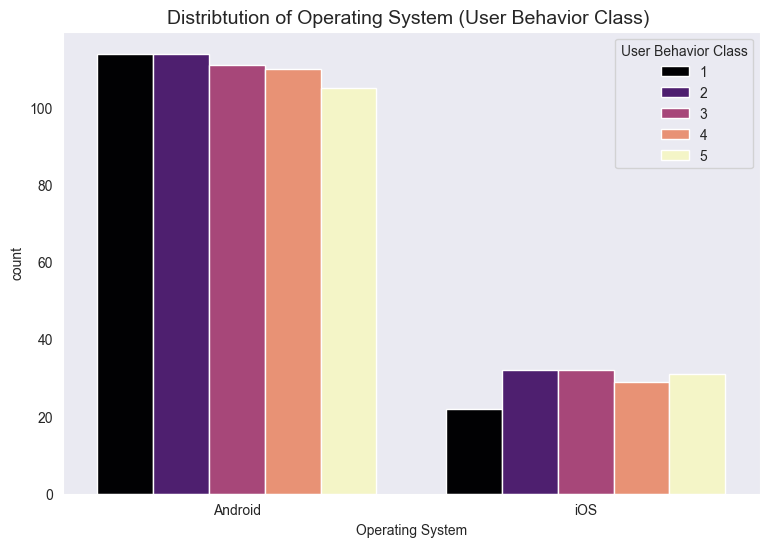

In [22]:
plt.figure(figsize=(9,6))
plt.title('Distribtution of Operating System (User Behavior Class) ', fontsize=14)
sns.countplot(x=df['Operating System'], palette='magma', hue=df['User Behavior Class'])
plt.show()

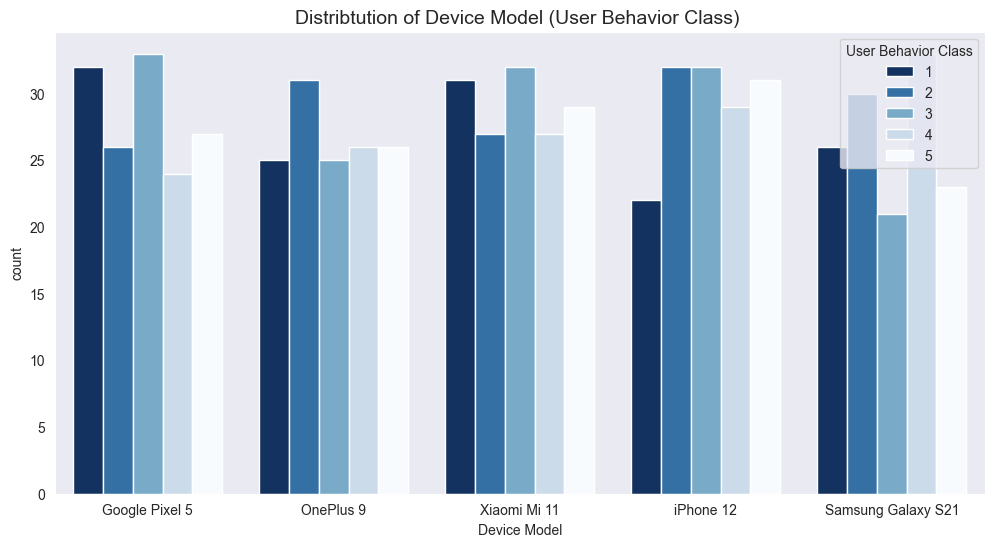

In [23]:
plt.figure(figsize=(12,6))
plt.title('Distribtution of Device Model (User Behavior Class) ', fontsize=14)
sns.countplot(x=df['Device Model'], palette='Blues_r', hue=df['User Behavior Class'])
plt.show()

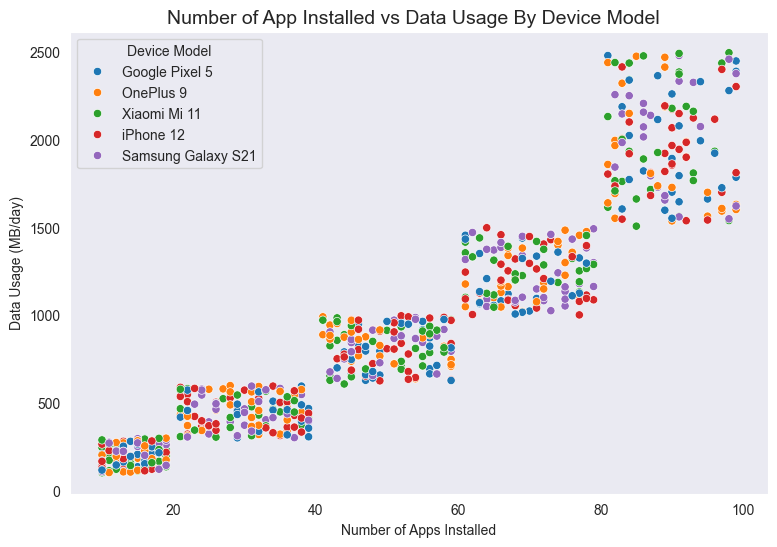

In [24]:
plt.figure(figsize=(9,6))
plt.title('Number of App Installed vs Data Usage By Device Model  ', fontsize=14)
sns.scatterplot(x=df['Number of Apps Installed'], y=df['Data Usage (MB/day)'], hue=df['Device Model'])
plt.show()

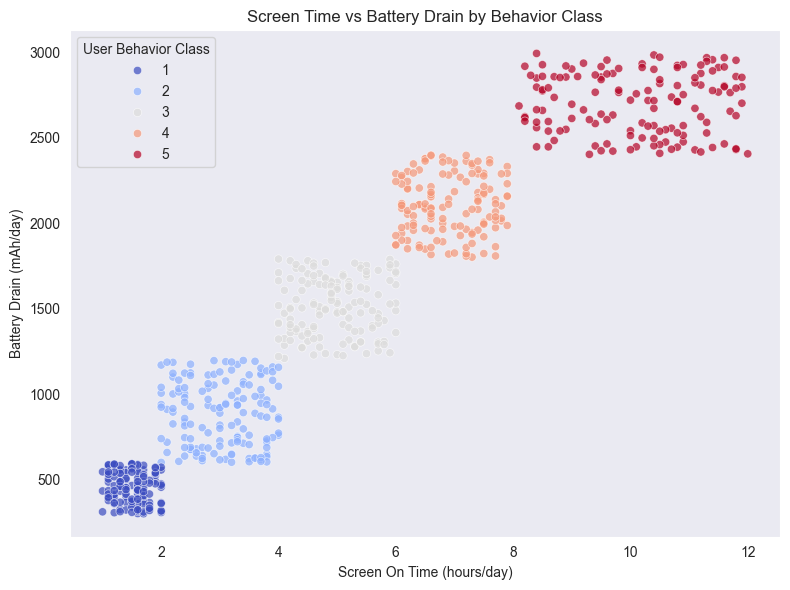

In [25]:
# Graph: Screen Time vs Battery Drain by Behavior Class
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Screen On Time (hours/day)', y='Battery Drain (mAh/day)', hue='User Behavior Class', palette='coolwarm',alpha=0.7)
plt.title('Screen Time vs Battery Drain by Behavior Class')
plt.tight_layout()
plt.show()


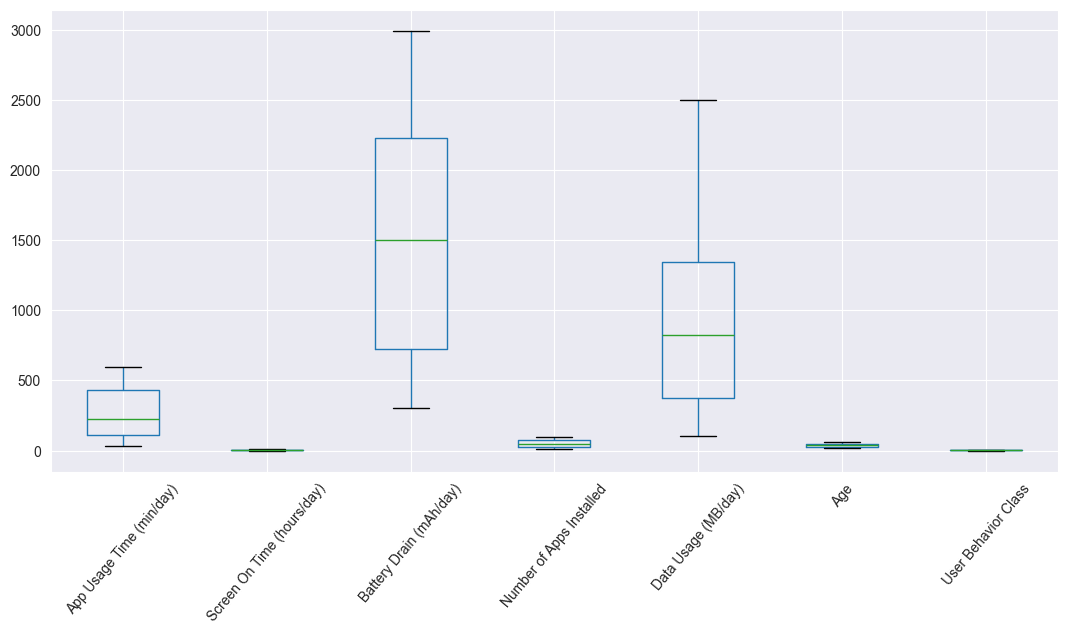

In [26]:
plt.figure(figsize=(13,6))
df.boxplot()
plt.xticks(rotation=50)
plt.show()


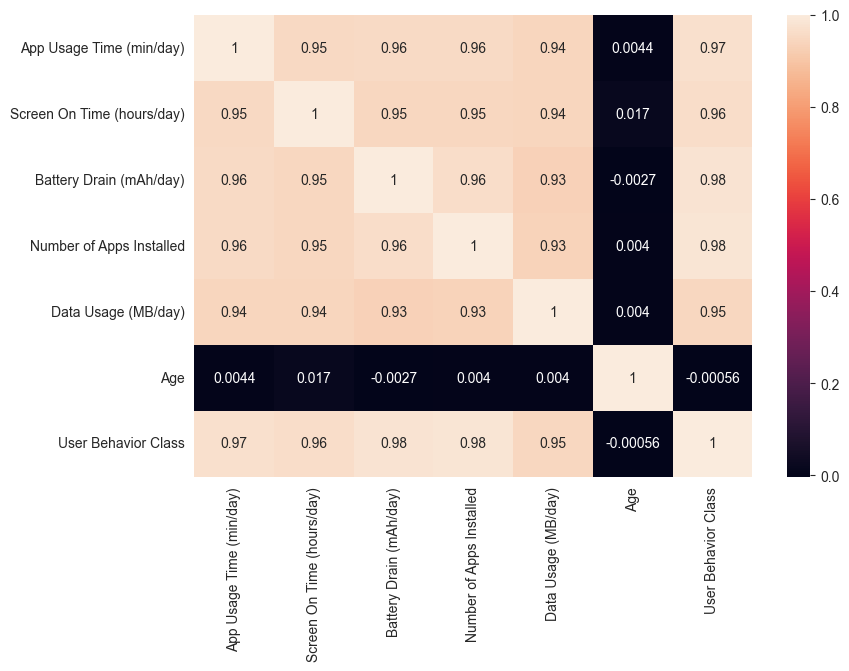

In [28]:
numeric_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(9,6))
sns.heatmap(numeric_df.corr(), annot=True)
plt.show()

# Label Encoding

✔Categorical convert To Numerical Number

In [29]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df.columns[df.dtypes=='object']:
    df[col] = le.fit_transform(df[col])

In [30]:
df.corr()['User Behavior Class']

Device Model                  0.037970
Operating System              0.041326
App Usage Time (min/day)      0.970498
Screen On Time (hours/day)    0.964581
Battery Drain (mAh/day)       0.978587
Number of Apps Installed      0.981255
Data Usage (MB/day)           0.946734
Age                          -0.000563
Gender                       -0.000735
User Behavior Class           1.000000
Name: User Behavior Class, dtype: float64

# Train test Split

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(df.drop(columns=['User Behavior Class']), 
df['User Behavior Class'], test_size=0.2)

In [32]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(560, 9)
(560,)
(140, 9)
(140,)


# Model Building

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report, recall_score, f1_score


# Random Forest Classifier

In [36]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred2 = rf.predict(X_test)
accuracy_score(y_test, y_pred2)

1.0

In [37]:
print(y_pred2[:5])
print(y_test[:5])

[1 1 1 4 3]
134    1
562    1
423    1
50     4
298    3
Name: User Behavior Class, dtype: int64


# Classification Reports

In [46]:
randomforest_report = classification_report(y_test,y_pred2)
print('\n Random Forest Classifier\n', randomforest_report)


 Random Forest Classifier
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        30
           2       1.00      1.00      1.00        22
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        30
           5       1.00      1.00      1.00        24

    accuracy                           1.00       140
   macro avg       1.00      1.00      1.00       140
weighted avg       1.00      1.00      1.00       140



In [44]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(RandomForestClassifier(), X, y, cv=5)
print(scores)
print("Average Accuracy:", scores.mean())


[1. 1. 1. 1. 1.]
Average Accuracy: 1.0


In [47]:
result=pd.DataFrame({'Classification Algorithms':['Random Forest Classifier'],
                ' Test Accuracy':[accuracy_score(y_test,y_pred2)],
                ' Test Precision':[precision_score(y_test,y_pred2,average='macro')],
                ' Test Recall':[recall_score(y_test,y_pred2,average='macro')],
                'Test F1 Score':[f1_score(y_test,y_pred2,average='macro')]})
result

,Classification Algorithms,Test Accuracy,Test Precision,Test Recall,Test F1 Score
0,Random Forest Classifier,1.0,1.0,1.0,1.0


In [49]:
# Define features and target
X = df.drop("User Behavior Class", axis=1)
y = df["User Behavior Class"]

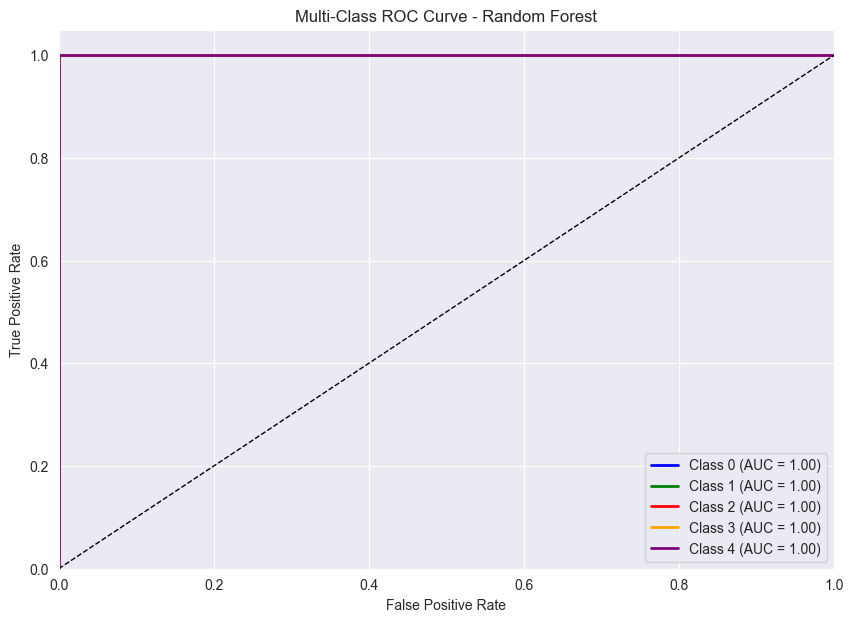

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc

# Assuming X and y are already defined in your notebook
# Binarize the output labels
y_binarized = label_binarize(y, classes=np.unique(y))
n_classes = y_binarized.shape[1]

# Train-test split
X_train, X_test, y_train_bin, y_test_bin = train_test_split(X, y_binarized, test_size=0.2, random_state=42)

# Train a One-vs-Rest classifier with Random Forest
model = OneVsRestClassifier(RandomForestClassifier())
model.fit(X_train, y_train_bin)

# Get prediction scores (probabilities)
y_score = model.predict_proba(X_test)

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
colors = cycle(['blue', 'green', 'red', 'orange', 'purple', 'brown'])
plt.figure(figsize=(10, 7))
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curve - Random Forest')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


# Random Forest Classifier Confution metrics Show in Graph

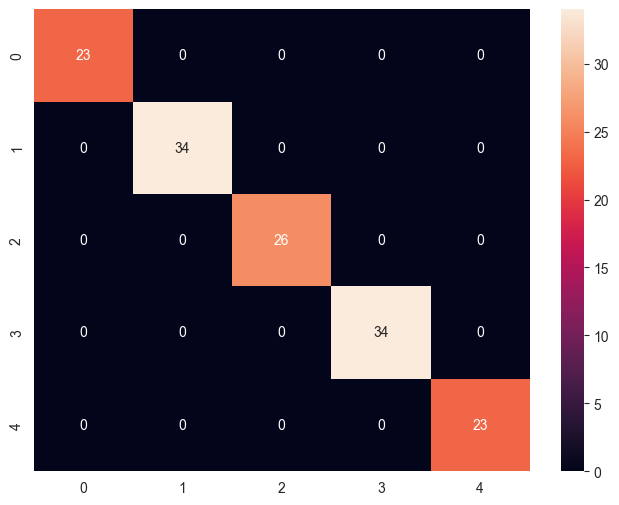

In [43]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test,y_pred2),annot=True)
plt.show()